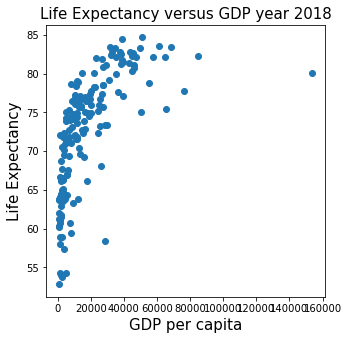

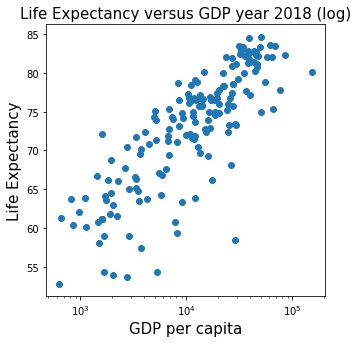

In [12]:
import pandas as pd
import matplotlib.pyplot as plt         

## A)
## Read in the datafile
df0 = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Using only the year 2018 differnce in
df2018 = df0.loc[df0['Year'] == 2018]
df2018 = df2018.dropna(subset=['GDP per capita', 'Life expectancy'])
del df2018['145446-annotations'], df2018['Continent']

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])

fs = 15
plt.title("Life Expectancy versus GDP year 2018", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.rcParams["figure.figsize"]=5,5
plt.show()

plt.title("Life Expectancy versus GDP year 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])
plt.xscale("log")

plt.rcParams["figure.figsize"]=5,5
plt.show()

In [13]:
# d)

df1 = df2018.describe()
mean = df1.loc['mean']['Life expectancy']
std = df1.loc['std']['Life expectancy']

df2 = df2018.loc[df2018['Life expectancy'] > mean + std]
df2 = df2.sort_values(by= 'Life expectancy', ascending = False)

df2[['Entity','Life expectancy',]]

,Entity,Life expectancy
19020,Hong Kong,84.68700
22030,Japan,84.47000
44307,Switzerland,83.63000
40617,Singapore,83.45800
42608,Spain,83.43300
21158,Italy,83.35200
2395,Australia,83.28100
19572,Iceland,82.85500
42111,South Korea,82.84600
20859,Israel,82.81900


In [14]:
# e)

lifeexpect = df1.loc['50%']['Life expectancy']

df2018['GDP'] = df2018['GDP per capita'] * df2018['Total population (Gapminder, HYDE & UN)']
df1 = df2018.describe()
mediangdp = df1.loc['50%']['GDP']
meangdp = df1.loc['mean']['GDP']


df3 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < mediangdp)]
df4 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < meangdp)] 

# If you prefer the median as an average
df3[['Entity','Life expectancy', 'GDP']]
# If you prefer the mean as an average
df4[['Entity','Life expectancy', 'GDP']]

,Entity,Life expectancy,GDP
413,Albania,78.45800,32013322110.00000
636,Algeria,76.69300,600821250840.00000
1745,Argentina,76.52000,823179573180.00000
1950,Armenia,74.94500,33813477360.00000
2395,Australia,83.28100,1240687258400.00000
...,...,...,...
45338,Thailand,76.93100,1155880389360.00000
46508,Tunisia,76.50500,131307737850.00000
47908,United Arab Emirates,77.81400,735787404420.00012
49197,Uruguay,77.77000,69620962160.00000


In [15]:
# f)

df5 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > mediangdp)]
df6 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > meangdp)]

# If you prefer the median as an average
df5[['Life expectancy','GDP']]
# If you prefer the mean as an average
df6[['Life expectancy','GDP']]

,Life expectancy,GDP
19691,69.41600,9206758099712.00000
19909,71.50900,3172367192353.91992
37499,72.38600,3595098929940.00000
50704,72.38600,116087364392704.00000


In [16]:
# g)

mediangdppercapita = df1.loc['50%']['GDP per capita']
meangdppercapita = df1.loc['mean']['GDP per capita']

df7 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > mediangdppercapita)]
df8 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > meangdppercapita)]

df7
df8

,Entity,Code,Year,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)",GDP
12958,Equatorial Guinea,GNQ,2018,58.40200,28528.95000,1309000.00000,37344395550.00000
22469,Kazakhstan,KAZ,2018,73.23600,25307.56000,18320000.00000,463634499200.00000
37499,Russia,RUS,2018,72.38600,24668.91000,145734000.00000,3595098929940.00000
40177,Seychelles,SYC,2018,73.33300,29531.06000,97000.00000,2864512820.00000
46288,Trinidad and Tobago,TTO,2018,73.38000,28549.41000,1390000.00000,39683679900.00000
46955,Turkmenistan,TKM,2018,68.07300,26318.37000,5851000.00000,153988782870.00000
